In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("salary1.csv")
df.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
#to delete unwanted column permanent
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
#to check null values 
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [6]:
#cross check 
df.dtypes

age                int64
Workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income             int64
dtype: object

In [7]:
#how many categories in output column
df['Income'].unique()

array([0, 1], dtype=int64)

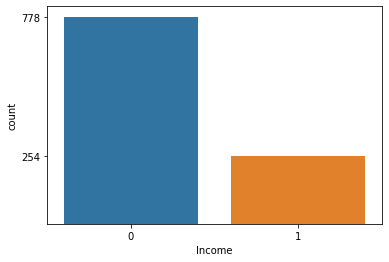

In [8]:
#how many samples of 0 & 1 class 
f=df['Income'].value_counts()
sns.countplot(data=df,x='Income')
plt.yticks(f)
plt.show()

In [9]:
#income=0 means salary <50k 
#& Income=1 means salary>=50k 

In [10]:
df['education'].value_counts()

 HS-grad         338
 Some-college    225
 Bachelors       184
 Masters          56
 Assoc-voc        50
 11th             39
 Assoc-acdm       37
 10th             19
 Doctorate        17
 9th              16
 7th-8th          14
 Prof-school      12
 5th-6th          10
 12th              9
 1st-4th           4
 Preschool         2
Name: education, dtype: int64

In [11]:
df['education-num'].value_counts()

9     338
10    225
13    184
14     56
11     50
7      39
12     37
6      19
16     17
5      16
4      14
15     12
3      10
8       9
2       4
1       2
Name: education-num, dtype: int64

In [12]:
#to delete education column from dataset permanent
df.drop("education",axis=1,inplace=True)
df.head()

,age,Workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [13]:
df['marital-status'].value_counts()

 Married-civ-spouse       472
 Never-married            345
 Divorced                 142
 Separated                 30
 Widowed                   28
 Married-spouse-absent     14
 Married-AF-spouse          1
Name: marital-status, dtype: int64

In [14]:
#apply LabelEncoder on object type column in given dataset df
from sklearn.preprocessing import LabelEncoder
#create object of LabelEncoder class 
le=LabelEncoder()
df['marital-status']=le.fit_transform(df['marital-status'])
df['marital-status'].value_counts()

2    472
4    345
0    142
5     30
6     28
3     14
1      1
Name: marital-status, dtype: int64

In [15]:
df['occupation'].value_counts()

 Prof-specialty       143
 Craft-repair         136
 Exec-managerial      131
 Sales                126
 Other-service        119
 Adm-clerical         101
 Machine-op-inspct     70
 Transport-moving      58
 Tech-support          47
 Handlers-cleaners     46
 Farming-fishing       32
 Protective-serv       18
 Priv-house-serv        4
 Armed-Forces           1
Name: occupation, dtype: int64

In [16]:
#create object of LabelEncoder class 
le=LabelEncoder()
df['occupation']=le.fit_transform(df['occupation'])
df['occupation'].value_counts()

9     143
2     136
3     131
11    126
7     119
0     101
6      70
13     58
12     47
5      46
4      32
10     18
8       4
1       1
Name: occupation, dtype: int64

In [17]:
df['relationship'].value_counts()

 Husband           401
 Not-in-family     290
 Own-child         148
 Unmarried         107
 Wife               66
 Other-relative     20
Name: relationship, dtype: int64

In [18]:
df['relationship']=le.fit_transform(df['relationship'])
df['relationship'].value_counts()

0    401
1    290
3    148
4    107
5     66
2     20
Name: relationship, dtype: int64

In [19]:
df['race'].value_counts()

 White                 886
 Black                 107
 Asian-Pac-Islander     26
 Amer-Indian-Eskimo      7
 Other                   6
Name: race, dtype: int64

In [20]:
df['race']=le.fit_transform(df['race'])
df['race'].value_counts()

4    886
2    107
1     26
0      7
3      6
Name: race, dtype: int64

In [21]:
df['sex'].value_counts()

 Male      701
 Female    331
Name: sex, dtype: int64

In [22]:
df['sex']=le.fit_transform(df['sex'])
df['sex'].value_counts()

1    701
0    331
Name: sex, dtype: int64

In [23]:
df['native-country'].value_counts()

 United-States         943
 Mexico                 23
 India                   5
 Germany                 4
 Portugal                4
 Cuba                    4
 Iran                    4
 Philippines             4
 Puerto-Rico             4
 Canada                  3
 England                 3
 Poland                  3
 Taiwan                  3
 Honduras                2
 Guatemala               2
 Japan                   2
 China                   2
 Haiti                   2
 Jamaica                 2
 Dominican-Republic      2
 El-Salvador             2
 South                   1
 Italy                   1
 Thailand                1
 France                  1
 Laos                    1
 Ecuador                 1
 Cambodia                1
 Columbia                1
 Yugoslavia              1
Name: native-country, dtype: int64

In [24]:
df['native-country']=le.fit_transform(df['native-country'])
df['native-country'].value_counts()

28    943
20     23
14      5
10      4
23      4
4       4
15      4
21      4
24      4
1       3
8       3
22      3
26      3
13      2
11      2
18      2
2       2
12      2
17      2
5       2
7       2
25      1
16      1
27      1
9       1
19      1
6       1
0       1
3       1
29      1
Name: native-country, dtype: int64

In [25]:
df['Workclass'].value_counts()

 Private             766
 Self-emp-not-inc     90
 Local-gov            76
 State-gov            40
 Self-emp-inc         38
 Federal-gov          22
Name: Workclass, dtype: int64

In [26]:
df['Workclass']=le.fit_transform(df['Workclass'])
df['Workclass'].value_counts()

2    766
4     90
1     76
5     40
3     38
0     22
Name: Workclass, dtype: int64

In [27]:
df.head()

,age,Workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,5,77516,13,4,0,1,4,1,2174,0,40,28,0
1,50,4,83311,13,2,3,0,4,1,0,0,13,28,0
2,38,2,215646,9,0,5,1,4,1,0,0,40,28,0
3,53,2,234721,7,2,5,0,2,1,0,0,40,28,0
4,28,2,338409,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
#df['occupation']=le.fit_transform(df['occupation'])
#df['occupation'].value_counts()
#df['relationship']=le.fit_transform(df['relationship'])
#df['race']=le.fit_transform(df['race'])
#df['sex']=le.fit_transform(df['sex'])
#df['native-country']=le.fit_transform(df['native-country'])
#df['Workclass']=le.fit_transform(df['Workclass'])

In [28]:
df.dtypes

age               int64
Workclass         int32
fnlwgt            int64
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
Income            int64
dtype: object

In [29]:
#select the input & output 
X=df.drop("Income",axis=1) #input variable
Y=df['Income']   #output

In [30]:
#train test split-70% & 30%
from sklearn.model_selection import train_test_split
#create objects of inbuilt class train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [31]:
X_train.head()

,age,Workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
286,35,2,193815,12,2,0,0,4,1,0,0,40,28
600,24,2,556660,9,4,3,2,4,1,4101,0,50,28
691,22,2,223515,13,4,9,4,4,1,0,0,20,28
474,28,2,189346,9,0,2,1,4,1,0,0,45,28
639,23,5,335453,13,4,12,1,4,0,0,0,20,28


In [32]:
#apply StandardScaler
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [33]:
X_train

array([[-0.25468375, -0.24904966,  0.02492289, ..., -0.2300775 ,
        -0.10196177,  0.25894641],
       [-1.12503586, -0.24904966,  3.41142413, ..., -0.2300775 ,
         0.77130512,  0.25894641],
       [-1.2832817 , -0.24904966,  0.30211862, ..., -0.2300775 ,
        -1.84849555,  0.25894641],
       ...,
       [-1.20415878, -1.2824626 ,  0.85337414, ..., -0.2300775 ,
         1.29526525,  0.25894641],
       [ 1.72338924,  1.81777623, -0.34225413, ..., -0.2300775 ,
         0.07269161,  0.25894641],
       [ 0.29917669,  1.81777623,  1.04437787, ..., -0.2300775 ,
        -0.10196177, -6.72086774]])

In [34]:
#create function 
def create_model(model):
    model.fit(X_train,Y_train) #train model with 70% data
    Y_pred=model.predict(X_test) #test model with 30% data 
    #generate report 
    print(classification_report(Y_test,Y_pred))
    #print confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
#perform model with LogisticRegression Algorithm (given dataset: classification algorithm)
from sklearn.linear_model import LogisticRegression

In [37]:
#create the object of LogisticRegression class 
lr=LogisticRegression()

In [38]:
#call function 
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       238
           1       0.72      0.40      0.52        72

    accuracy                           0.83       310
   macro avg       0.78      0.68      0.71       310
weighted avg       0.81      0.83      0.81       310

[[227  11]
 [ 43  29]]


In [ ]:
#F1-score see because here 0 & 1 both are imp 
#F1-score means HM(harmonic mean) of recall & precision
#F1-score = 2*recall*precision/(recall+precision)

In [ ]:
#0 : samples : max 778   (majority class)
#1 : samples : min 254   (minority class)
#clearly show, our dataset is unbalanced . 
#now we have to apply sampling technique
#means we have to balanced given dataset 
#there are 2 types of sampling technique:
#1.RandomOverSampling
#2.RandomUnderSampling 

In [ ]:
#1.RandomOverSampling means to converts minority class 
#means increase means make duplicates copy of some existing records randomly & force
#minority class converts majority class 